# How random are you?

In [196]:
#test a uniform distributions first
test_image = np.random.randint(low = 0, high = 255, size = (174, 174, 3))
test_imageunit8 = test_image.astype(np.uint8)
plt.imsave('real_random.png',test_imageunit8)

#test all black 
test_image = np.full((174,174,3),254)
test_imageunit8 = test_image.astype(np.uint8)
plt.imsave('zeros.png',test_imageunit8)

In [197]:
filter_path = '/content/zeros.png'

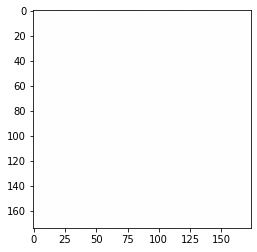

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
img = mpimg.imread(filter_path)
imgplot = plt.imshow(img)
plt.show()

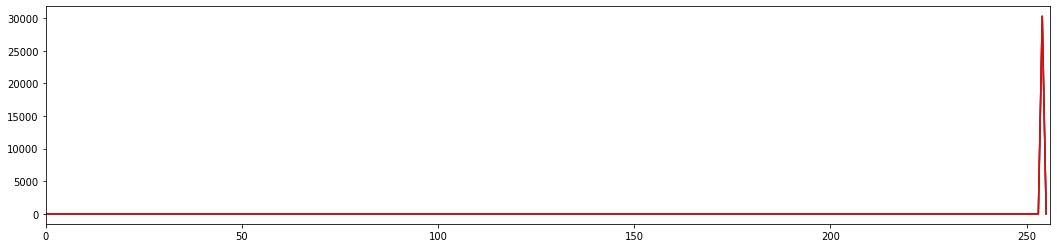

In [199]:
img = cv.imread(filter_path)

color = ('b','g','r')
plt.figure(figsize=(18,4))
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [200]:
histrb = cv.calcHist([img],[0],None,[256],[0,256])
histrg = cv.calcHist([img],[1],None,[256],[0,256])
histrr = cv.calcHist([img],[2],None,[256],[0,256])

In [201]:
def mean_sub(x,mean):
  return abs(x - mean)
vmean_sub = np.vectorize(mean_sub)

In [202]:
mean = np.mean(histrb)

In [203]:
bsub = vmean_sub(histrb,mean)
gsub = vmean_sub(histrg,mean)
rsub = vmean_sub(histrr,mean)

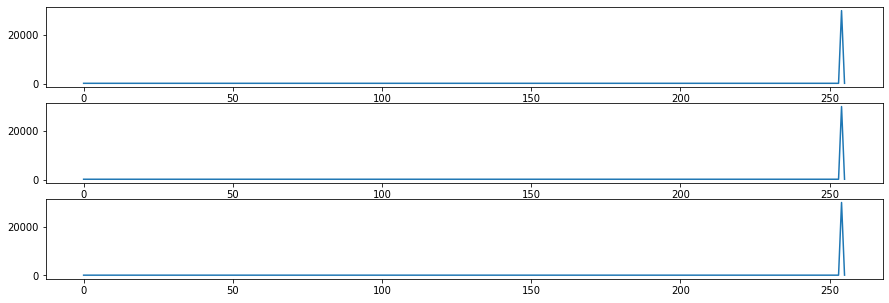

In [204]:
f, axarr = plt.subplots(3, figsize=(15,5))
axarr[0].plot(bsub)
axarr[1].plot(gsub)
axarr[2].plot(rsub)

In [205]:
final_score = np.mean([np.mean(bsub),np.mean(gsub),np.mean(rsub)])

In [207]:
print(final_score)

235.6073


In [206]:
def mean_sub(x,mean):
  return abs(x - mean)
vmean_sub = np.vectorize(mean_sub)

def calc_score(path):
  #load image in opencv
  img = cv.imread(filter_path)
  #calc the three histograms 
  histrb = cv.calcHist([img],[0],None,[256],[0,256])
  histrg = cv.calcHist([img],[1],None,[256],[0,256])
  histrr = cv.calcHist([img],[2],None,[256],[0,256])
  #calc che mean (shape dependent)
  mean = np.mean(histrb)
  #subtract the mean to all values of the histogram
  bsub = vmean_sub(histrb,mean)
  gsub = vmean_sub(histrg,mean)
  rsub = vmean_sub(histrr,mean)
  #the final score is the mean of the found value,
  #i.e how far away you are from uniform, for all three
  final_score = np.mean([np.mean(bsub),np.mean(gsub),np.mean(rsub)])
  return final_score/235.6073